In [7]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

import random
import numpy as np
from collections import Counter

In [129]:
## Coin Proportions

# The sample space is the possible outcomes in a coin flip
sample_space = ['H','T']
# N is the number of events
N = 500

# We randomly flip the coin N times by randomly sampling from the event space n teams
flips = np.random.choice(a = sample_space, size = N, replace = True)
# Use the Counter method to find the proportion of heads for the first n events
heads_proportion = np.array([Counter(flips[0:n-1])['H'] / n for n in range(1,N+1)])

Text(0,0.5,'Proportion of Heads')

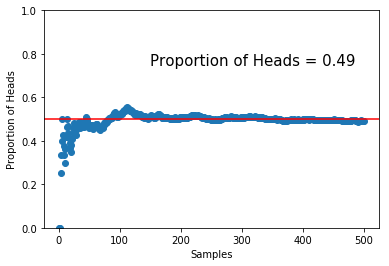

In [131]:
# The X and Y values for scatterplots. 
x = range(1,N+1)
y = heads_proportion

plt.ylim(0, 1)
plt.scatter(x,y)
plt.text(150,0.75, 'Proportion of Heads = ' + str(heads_proportion[-1]), fontsize = 15)
plt.axhline(y=0.5, color='r', linestyle='-')
plt.xlabel('Samples')
plt.ylabel('Proportion of Heads')

# Discrete Distributions

In [144]:
# Randomly sample heights (in inches) from a normal distribution
mu, sigma = 67, 4 # mean and standard deviation
s = np.random.normal(mu, sigma, 10000)

Text(0,0.5,'Probability Density')

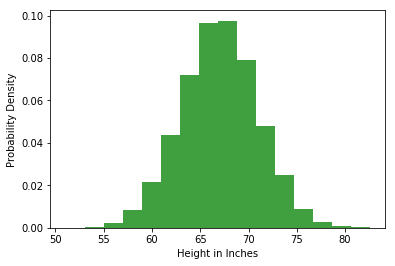

In [164]:
n, bins, patches = plt.hist(s, 16, normed=1, facecolor='green', alpha=0.75)
plt.xlabel('Height in Inches')
plt.ylabel('Probability Density')

Text(0,0.5,'Probability Density')

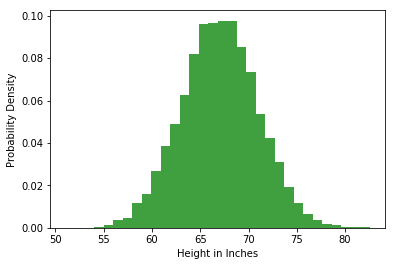

In [165]:
n, bins, patches = plt.hist(s, 32, normed=1, facecolor='green', alpha=0.75)
plt.xlabel('Height in Inches')
plt.ylabel('Probability Density')

# Continuous Distributions

probability density - ratio of probability mass to width

$\int p(x) dx = 1$

Normal Probability Density (Gaussian) - $\mu$ is the mean and $\sigma$ is the standard deviation

$p(x) = \frac{1}{\sigma \sqrt{2\pi}}\exp{-\frac{1}{2}\big[\frac{x-\mu}{\sigma}\big]^2}$

# Mean and Variance

Discrete Mean: $E[X] = \sum_x xp(x)$

Discrete Variance: $Var[X] = E\big[(X-\mu)^2\big] = E\big[X^2\big] - E[X]^2$

Continuous Mean: $E[X] = \int xp(x) dx$

Discrete Variance: $Var[X] = \int p(x)(x - E[X])^2 dx $

# Highest Density Interval (HDI)

HDI is an interval on a distribution which includes the most credible points. Given a fraction Q, the Q percent HDI include all values of x such that its density is greater than W ($p(x) > W$) where W satisfies $\int_{x:p(x) > W} p(x) dx = Q$.



# Conditional Probability

The probability of an outcome given the existence of another outcome.

$ p(X=a|Y=b) = \frac{p(X=a,Y=b)}{\sum_{x*} p(X=x,Y=b)} $